In [5]:
import pandas as pd
import os
from random import randint
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Creating train,validation and test sets
data = pd.read_csv('data_labels.csv')
for _, row in data.iterrows():
    print(f'label: {row.labels}')
    print(f'Image name: {row.img_name}')
    break

dataset_dir = 'data/'
train_dir = 'data/train/'
val_dir = 'data/validation/'
test_dir = 'data/test/'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split the DataFrame into training, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_split = 0.7
val_split = 0.15
test_split = 0.15

df = data.sample(frac=1, random_state=42)

total_images = len(df)
num_train = int(total_images * train_split)
num_val = int(total_images * val_split)
num_test = total_images - num_train - num_val

# Copy/move training images
for _, row in df[:num_train].iterrows():
    src = os.path.join(dataset_dir, row['img_name'])
    dst = os.path.join(train_dir, row['img_name'])
    shutil.copyfile(src, dst)

# Copy/move validation images
for _, row in df[num_train:num_train+num_val].iterrows():
    src = os.path.join(dataset_dir, row['img_name'])
    dst = os.path.join(val_dir, row['img_name'])
    shutil.copyfile(src, dst)

# Copy/move test images
for _, row in df[num_train+num_val:].iterrows():
    src = os.path.join(dataset_dir, row['img_name'])
    dst = os.path.join(test_dir, row['img_name'])
    shutil.copyfile(src, dst)

#Saving the df into csv files

train_df.to_csv('train_set.csv')
test_df.to_csv('test_set.csv')
val_df.to_csv('val_set.csv')

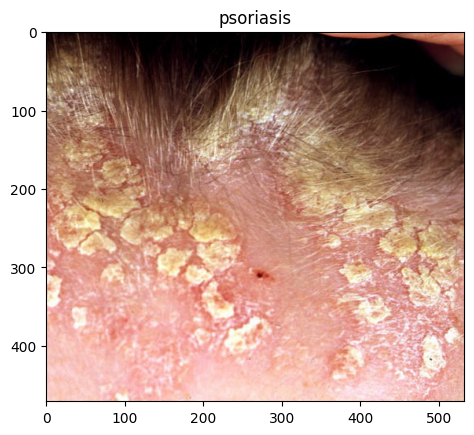

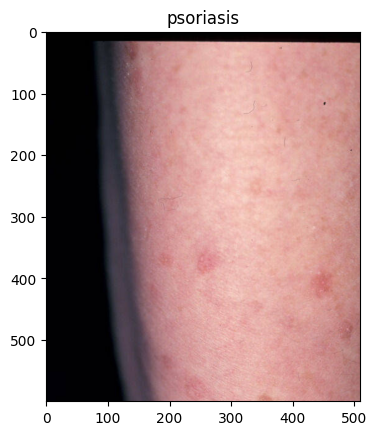

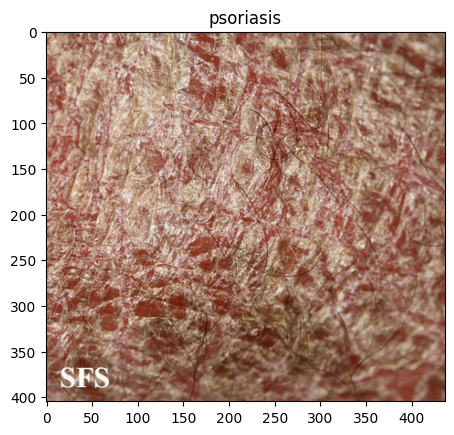

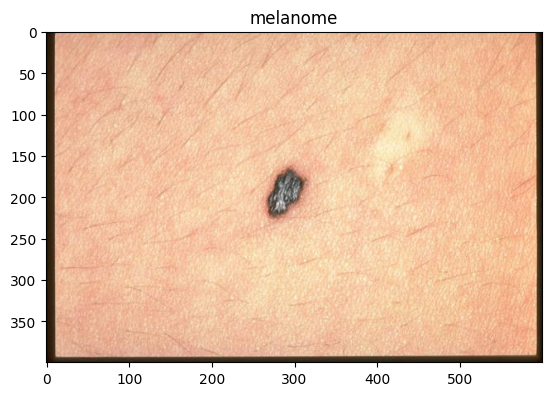

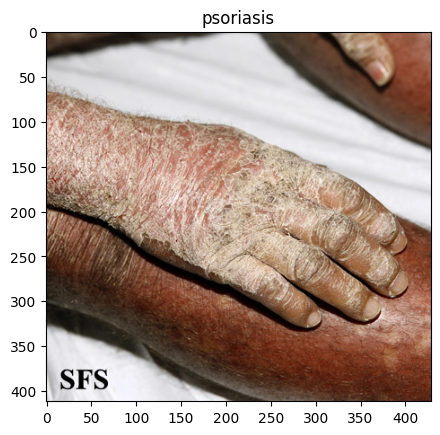

In [6]:
data = pd.read_csv('data_labels.csv')
dir = 'data/'
#Visualizar a imagem antes do pre-processamento
image_files = [f for f in os.listdir(dir) if f.endswith(".jpg") or f.endswith(".png")]
count = 0
while count < 5:
    count += 1
    index = randint(0,len(data)-1)
    image_path = os.path.join(dir, data.loc[index,'img_name'])
    img = np.asarray(Image.open(image_path))
    plt.title(label = data.loc[index,'labels'])
    plt.imshow(img)
    plt.show()

In [9]:
import torch.nn as nn
#Simulando nosso modelo somente com as camdas convolucionais

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, padding=0), 
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(32, 64, kernel_size=3, padding=0),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(64, 128, kernel_size=3, padding=0),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(128, 128, kernel_size=3, padding=0),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=1)
                
        )


        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 22 * 22, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


model = NeuralNetwork()

/home/king/mambaforge/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


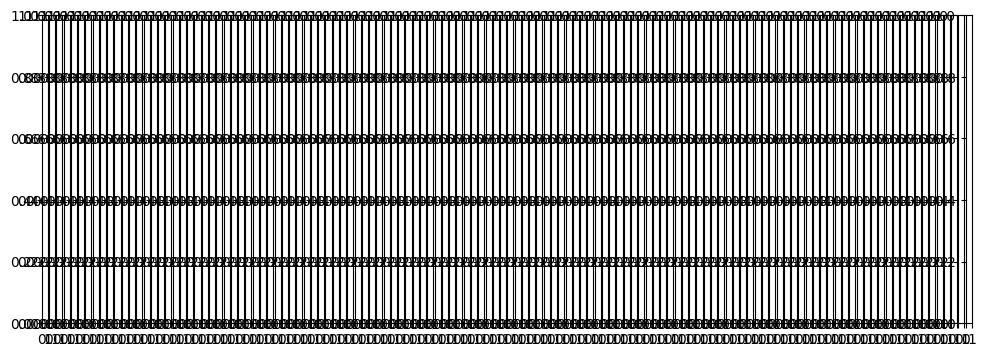

In [8]:
from torchvision import datasets,transforms
import torch

transforms = transforms.Compose([
    #transforms.RandomRotation(50,fill=1),
    #transforms.RandomCrop(size=(224, 224)),
    transforms.RandomResizedCrop((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),  # Converte para tensor
    transforms.Resize((224,224)),
])

image_path = 'data/sebopsoriasis3.jpg'  # Replace with your image path
image = Image.open(image_path)
input_data = transforms(image)

with torch.no_grad():
    features = model.conv_layers(input_data)
    # Convert the feature tensor to a NumPy array


